### **Implementation of LeNet-5**

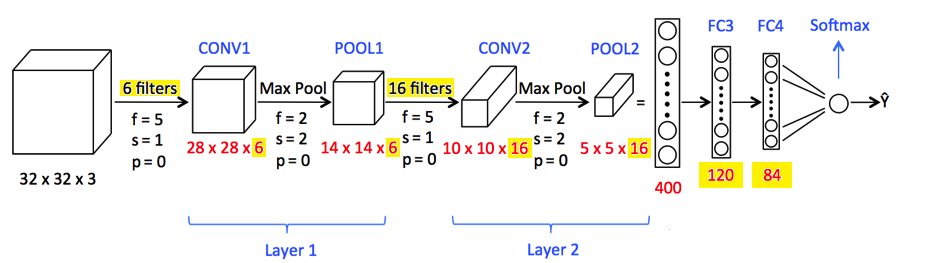

### **Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

### **Load and preprocess the MNIST dataset:**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data for LeNet-5
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


### **Define the LeNet-5 architecture:**


In [ ]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

### **Compile and train the model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 28ms/step - loss: 0.4655 - accuracy: 0.8622 - val_loss: 0.1850 - val_accuracy: 0.9460
Epoch 2/10
375/375 [==============================] - 11s 28ms/step - loss: 0.1484 - accuracy: 0.9553 - val_loss: 0.1141 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0985 - accuracy: 0.9697 - val_loss: 0.0802 - val_accuracy: 0.9764
Epoch 4/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0739 - accuracy: 0.9777 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 6/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0633 - val_accuracy: 0.9798
Epoch 7/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0476 - val_accuracy:

### **Plot the accuracy and loss curves:**

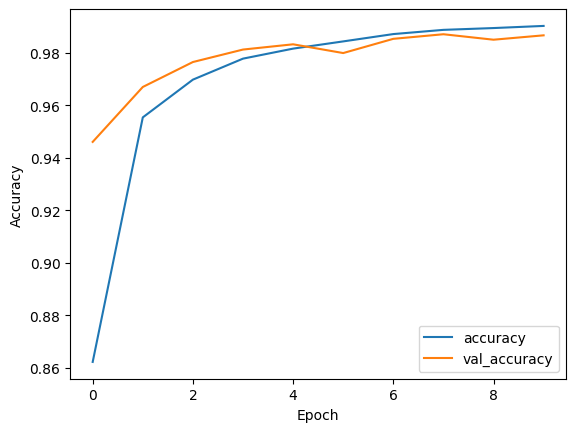

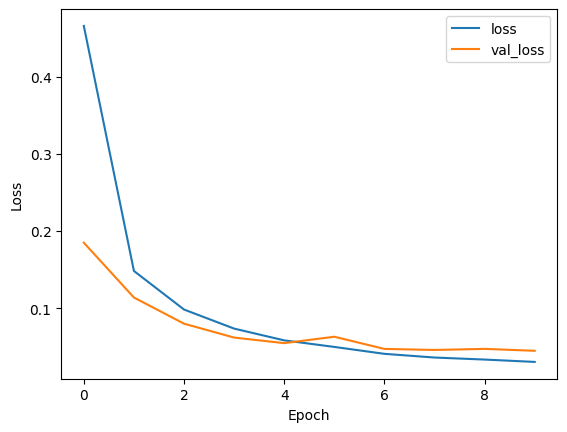

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Perform final classification on the test set:**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


313/313 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9863
Test accuracy: 0.986299991607666
313/313 [==============================] - 2s 6ms/step
Confusion Matrix:
[[ 973    0    0    0    0    0    2    3    0    2]
 [   0 1126    1    2    0    1    2    1    2    0]
 [   2    0 1019    0    0    0    0    5    6    0]
 [   1    0    2  992    0    6    0    4    2    3]
 [   0    0    2    0  969    0    4    0    0    7]
 [   2    0    0    6    0  879    3    0    2    0]
 [   5    2    0    0    2    2  947    0    0    0]
 [   0    4    4    1    0    0    0 1008    3    8]
 [   5    0    1    1    0    2    1    5  957    2]
 [   0    2    0    1    5    5    0    3    0  993]]


313/313 [==============================] - 1s 3ms/step


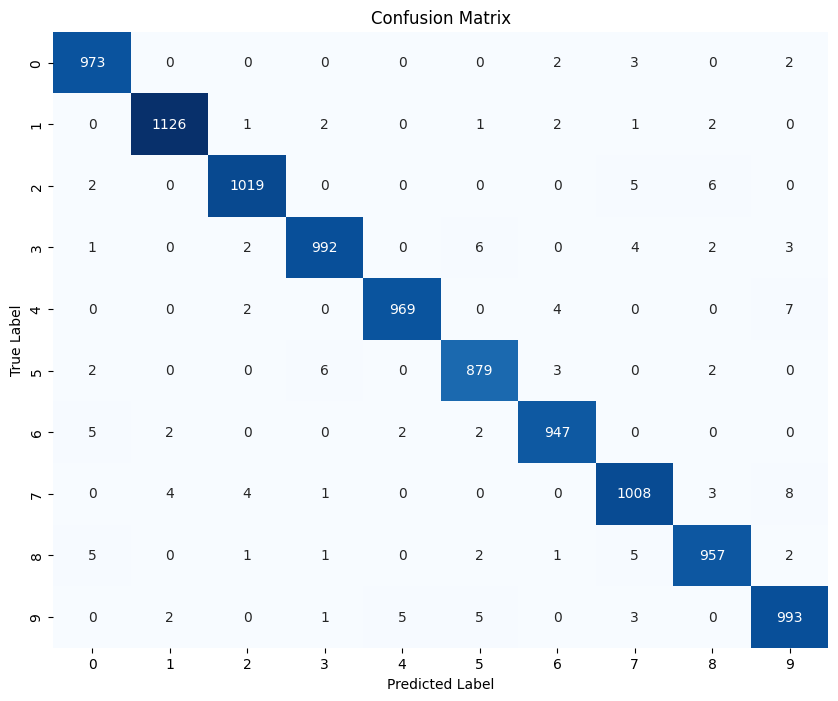

In [ ]:
import seaborn as sns
# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Visualization of test results**

1/1 [==============================] - 0s 16ms/step


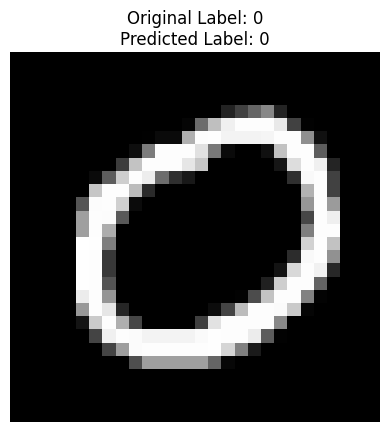

In [ ]:
# Choose a random test image
index = np.random.randint(0, len(X_test))

# Get the original label
original_label = np.argmax(y_test[index])

# Get the model's prediction
prediction = np.argmax(model.predict(np.expand_dims(X_test[index], axis=0)))

# Plot the test image
plt.imshow(X_test[index].squeeze(), cmap='gray')
plt.title(f'Original Label: {original_label}\nPredicted Label: {prediction}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 15ms/step


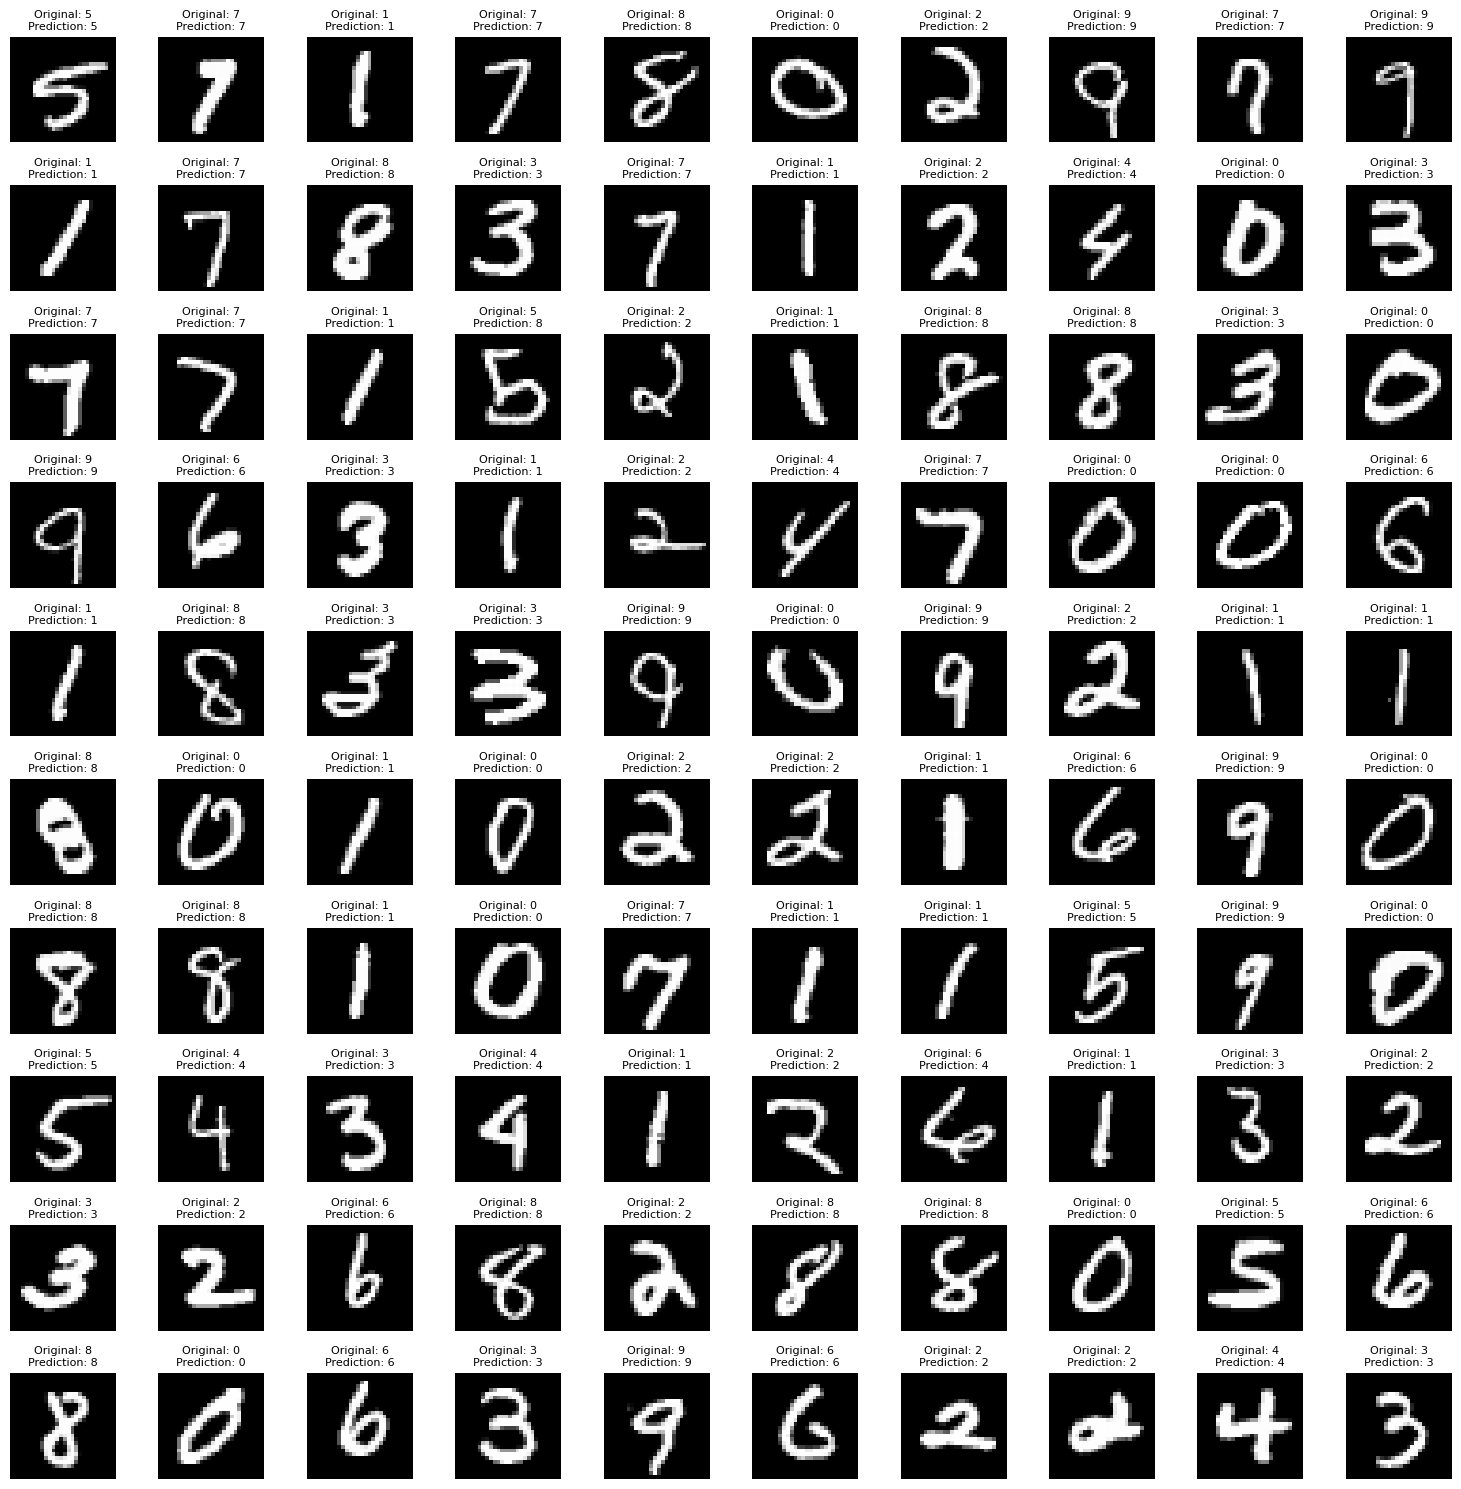

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.flatten()

for i in range(100):
    index = np.random.randint(0, len(X_test))
    original_label = np.argmax(y_test[index])

    prediction = np.argmax(model.predict(np.expand_dims(X_test[index], axis=0)))

    axes[i].imshow(X_test[index].squeeze(), cmap='gray')
    axes[i].set_title(f'Original: {original_label}\nPrediction: {prediction}', fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### **Visualizing the mis classification**

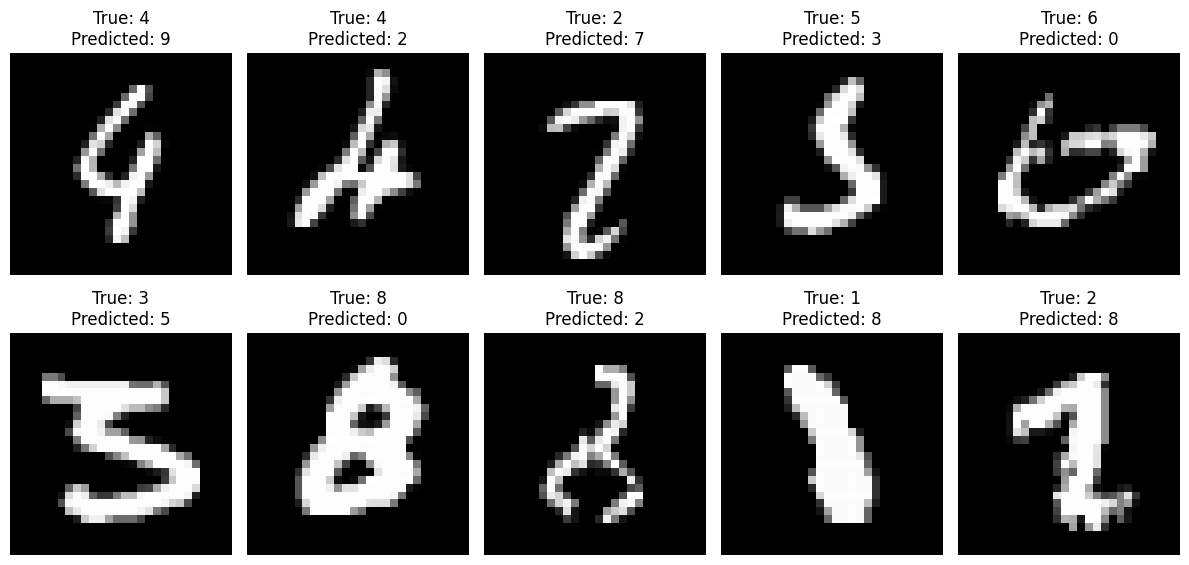

In [ ]:
# Find misclassifications
misclassified_indices = np.where(np.argmax(y_test, axis=1) != y_pred)[0]

# Visualize misclassifications
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):  # Display first 10 misclassifications
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[idx])}\nPredicted: {y_pred[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
